# Winemag Insights. Top Wine Rankings From All Around The World 

In [351]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Link: https://www.kaggle.com/datasets/zynicide/wine-reviews

 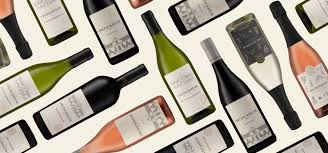

#### This Wine Dataset from winemag looks at the wine drinking preferences of cusomters from all over the world in 2017. The data population consists 
#### of 129 970 observations in total of specific wines, and records their title, grape variety or cultiver, country of origin, price in dollars and 
#### point ranking amongst other information. The point ranking is an index with a maximum of 100. All the wines in the data are ranked between 80 and 100, 
#### indicating that these are the top ranked wines in the world. Based on the information provided it is assumed, that the ranking is according 
#### to consumer preferences and not expert sommelier's opinion. 

## Exploring the Data 

In [32]:
wines = pd.read_csv("/Users/Mthuthukile/Desktop/dspt18/EDA-Assignment-Mthuthukile/wine-data/winemag-data-130k-v2.csv")

In [35]:
wines 

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [48]:
#Checking for any repeated country name sin different formats 

wines['country'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [39]:
#Deleting any potential duplicate information 

print(f"Number of rows before: {wines.shape[0]}")

wines = wines.drop_duplicates()

print(f"Number of rows after: {wines.shape[0]}")

Number of rows before: 129971
Number of rows after: 129971


In [42]:
#Deleting rows which are all empty

print(f"Number of rows before: {wines.shape[0]}")

wines.dropna(how = "all", inplace = True)

print(f"Number of rows after: {wines.shape[0]}")

Number of rows before: 129971
Number of rows after: 129971


In [54]:
#Checking that price is not an object (string), and that all other data types are correct. 

wines.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


### What are the rankings and intervals?

In [66]:
wines["points"].unique()

array([ 87,  86,  85,  88,  92,  91,  90,  89,  83,  82,  81,  80, 100,
        98,  97,  96,  95,  93,  94,  84,  99])

Text(0.5, 0, 'Ranking in Percentage Points')

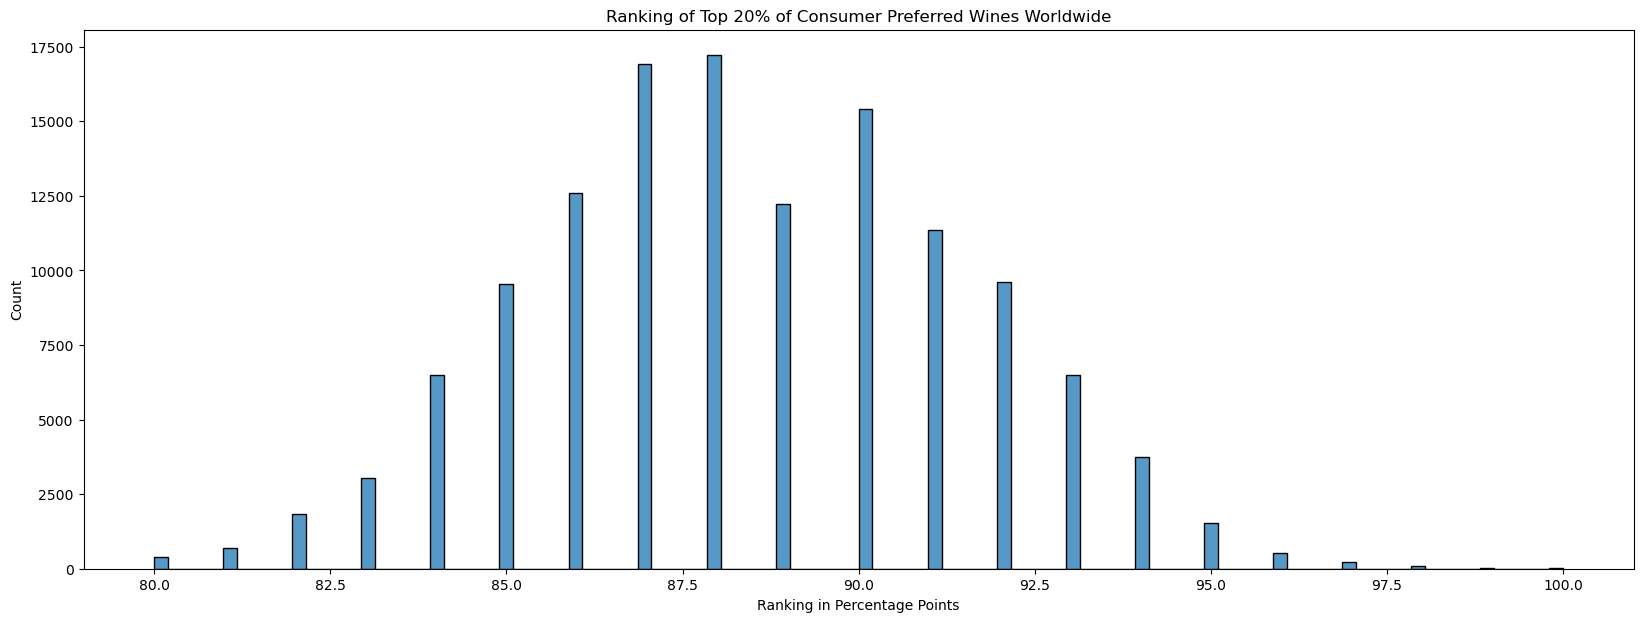

In [92]:
#Setting plotsize 
plt.figure(figsize =(20,7))


#Setting plot dimensions 
sns.histplot(
    data = wines,
    x = "points"
)

#Labelling Histogram for Easier Read
plt.title ("Ranking of Top 20% of Consumer Preferred Wines Worldwide")
plt.xlabel ("Ranking in Percentage Points")

#### The data is almost normally distributed, with majoity of wines in the 10 thousands and up 87 to 90 points. The most issued ranking is 88 points followed by 87 which have roughly 16900 and 16850 wines allocated respectively. 

#### For this dataset we will be exploring any realtioships with the Quality of the wine and how it influences price and if there is a relationship with quality of wine and country of origin. 

## Price and Quality of Wine 


#### We will firstly investigate if there is a relatioship with the wine ranking and the price of the wine. We axpect that there is a positive relationship.  

In [312]:
wines["price"].max()

3300.0

In [314]:
wines["price"].min()

4.0

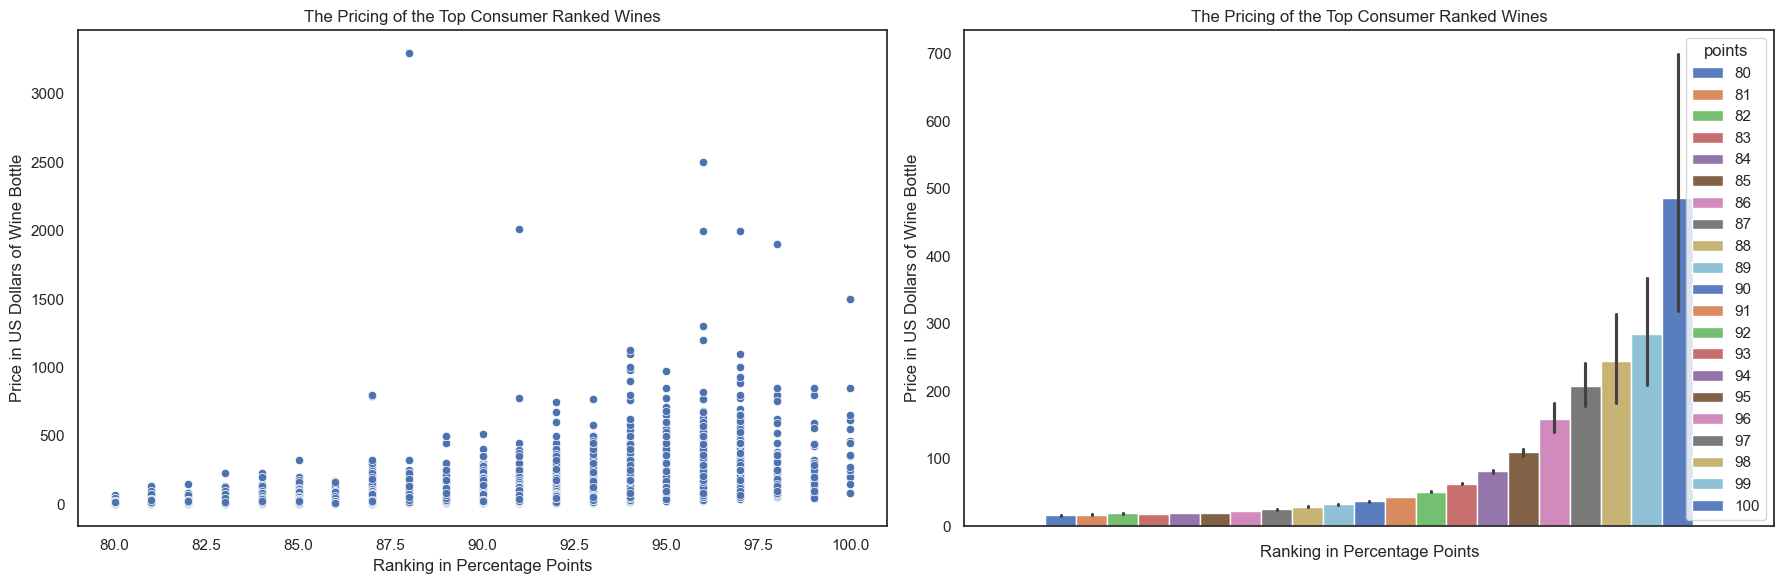

In [382]:
#Creating Subplots as I would like two graphs nex to eachother 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,6))
sns.set_theme(style = "white")

#Creating Scatterplot 
sns.scatterplot(
    data = wines, 
    x = "points",
    y = "price",
    ax = axes[0]
)

axes[0].set_title("The Pricing of the Top Consumer Ranked Wines")
axes[0].set_xlabel("Ranking in Percentage Points") 
axes[0].set_ylabel("Price in US Dollars of Wine Bottle")


#Creating Barchart
sns.barplot(
    data = wines, 
    hue = "points",
    y = "price",
    ax = axes[1],
    palette = "muted"
)

axes[1].set_title("The Pricing of the Top Consumer Ranked Wines")
axes[1].set_xlabel("Ranking in Percentage Points") 
axes[1].set_ylabel("Price in US Dollars of Wine Bottle")

#Adjust layout to prevent overlapping
plt.tight_layout()

Text(0, 0.5, 'Price in US Dollars of Wine Bottle')

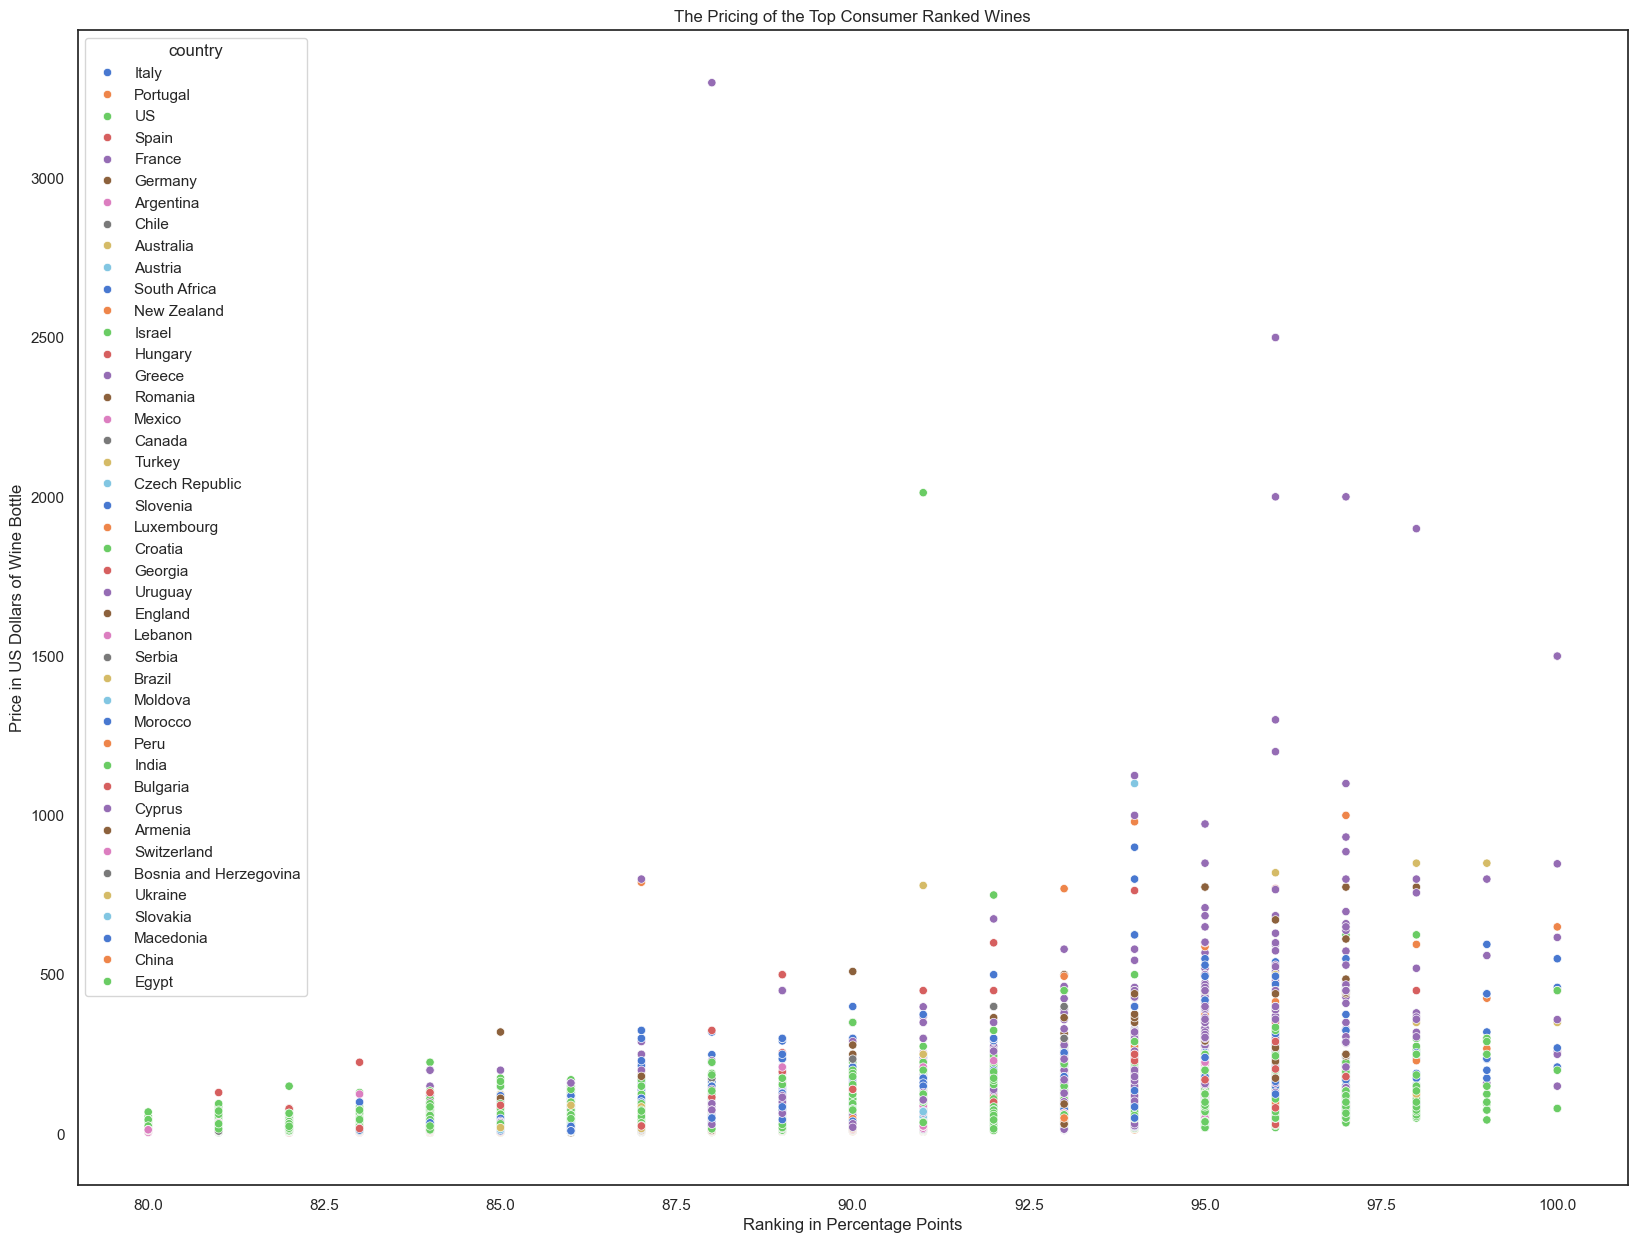

In [230]:
#Setting plotsize
plt.figure(figsize = (20,15))
sns.set_theme(style = "white")

#Creating Scatterplot 
sns.scatterplot(
    data = wines, 
    x = "points",
    y = "price",
    hue = "country", 
    palette = "muted"
)

#Labelling scatterplot for easier 
plt.title("The Pricing of the Top Consumer Ranked Wines")
plt.xlabel("Ranking in Percentage Points") 
plt.ylabel("Price in US Dollars of Wine Bottle")

#### It is clear that is indeed a positive relationship between Price and Ranking. With a few outliers, the higher the ranking the more expensive the wine.

## Price of wine by Country 

#### We would like to assess the price of the wine based on counrty, but before doing that, we would need a sense of hoe many countries there are and the wine distribution of each country in this Dataset

In [159]:
#Checking for wine distribution by country
wines["country"].value_counts()

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


In [167]:
#Checking for wine distribution by country percebtage
wines["country"].value_counts(normalize = True)

country
US                        0.419558
France                    0.170067
Italy                     0.150414
Spain                     0.051152
Portugal                  0.043808
Chile                     0.034424
Argentina                 0.029251
Austria                   0.025749
Australia                 0.017928
Germany                   0.016666
New Zealand               0.010923
South Africa              0.010785
Israel                    0.003887
Greece                    0.003587
Canada                    0.001978
Hungary                   0.001124
Bulgaria                  0.001085
Romania                   0.000924
Uruguay                   0.000839
Turkey                    0.000693
Slovenia                  0.000670
Georgia                   0.000662
England                   0.000570
Croatia                   0.000562
Mexico                    0.000539
Moldova                   0.000454
Brazil                    0.000400
Lebanon                   0.000269
Morocco     

#### Almost 75% of the wine bottles in the data is in the top 3 countries; US, France, and Italy. This may influence some of the data-by-country information we observe. 


#### We would like to remove Rankiing an purely observe Price by country. We would like to obersve if there can be price expectations from wines based on where they originate from.  

Text(0, 0.5, 'Country Origin')

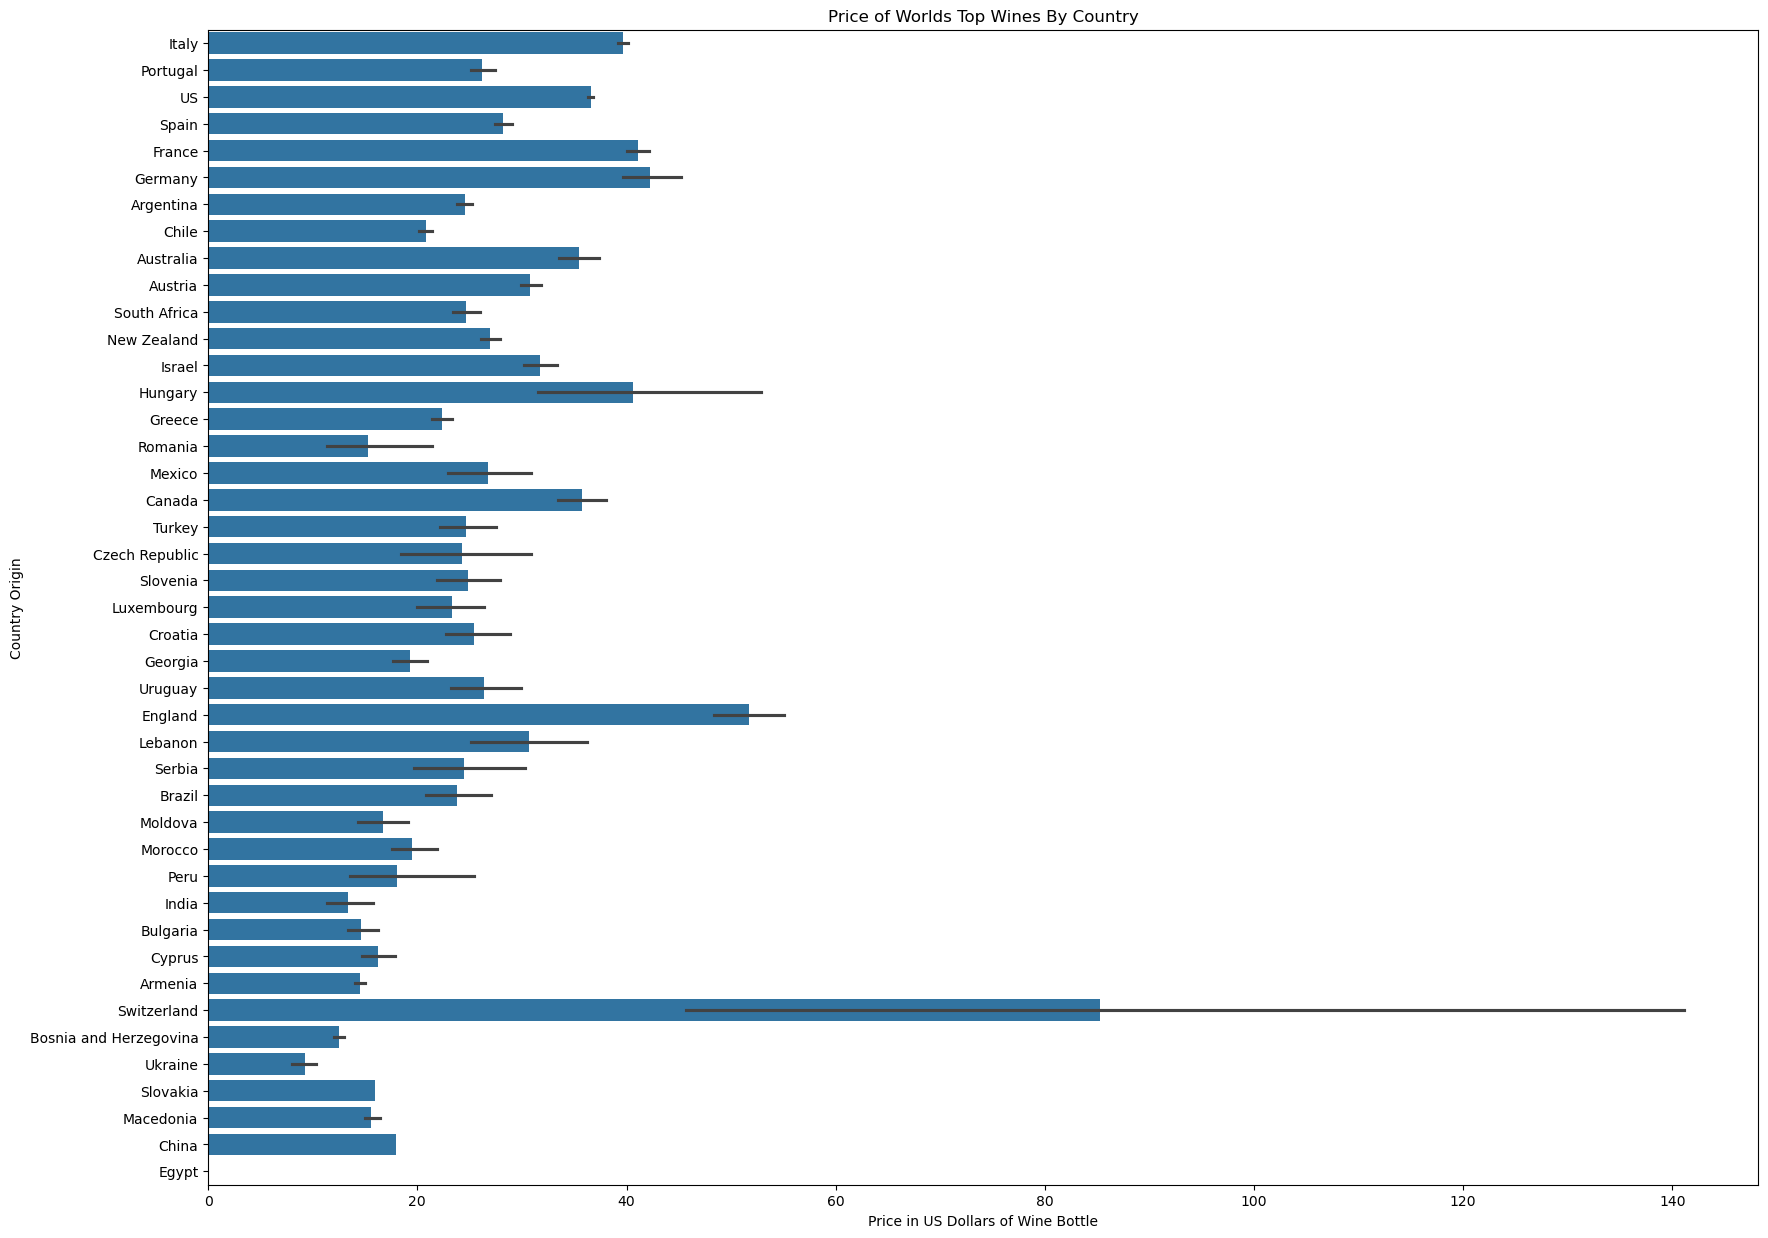

In [191]:
#Setting plotsize 
plt.figure(figsize =(20,15))

#Creating Bar Chart
sns.barplot(
    data = wines, 
    x = "price",
    y = "country",
)

#Labelling bar plot for easier read 
plt.title("Price of Worlds Top Wines By Country")
plt.xlabel("Price in US Dollars of Wine Bottle")
plt.ylabel("Country Origin")

#### It seems like the more bottles produced the lower the prices of wine. 
#### Some of th emost expensive wines come from the least producing nations. Overall The countries with less wine bottles have a higher price of wine. The most expensive bottle is from Switzerland exmaple, which comprises of 0.000054% of the totle amount of wine bottles on the list.  
#### This could be due to Economies of scale. 


## Quality of Wine By Country

#### Now that we have seen the Price relationship with the wines, we will observe the Quality relationship. While have looke at the Price relationship with with Quality, we are
#### now interested in whether higher quality wines come from certain Countries and from specific regions. 

Text(0, 0.5, 'Country Origin')

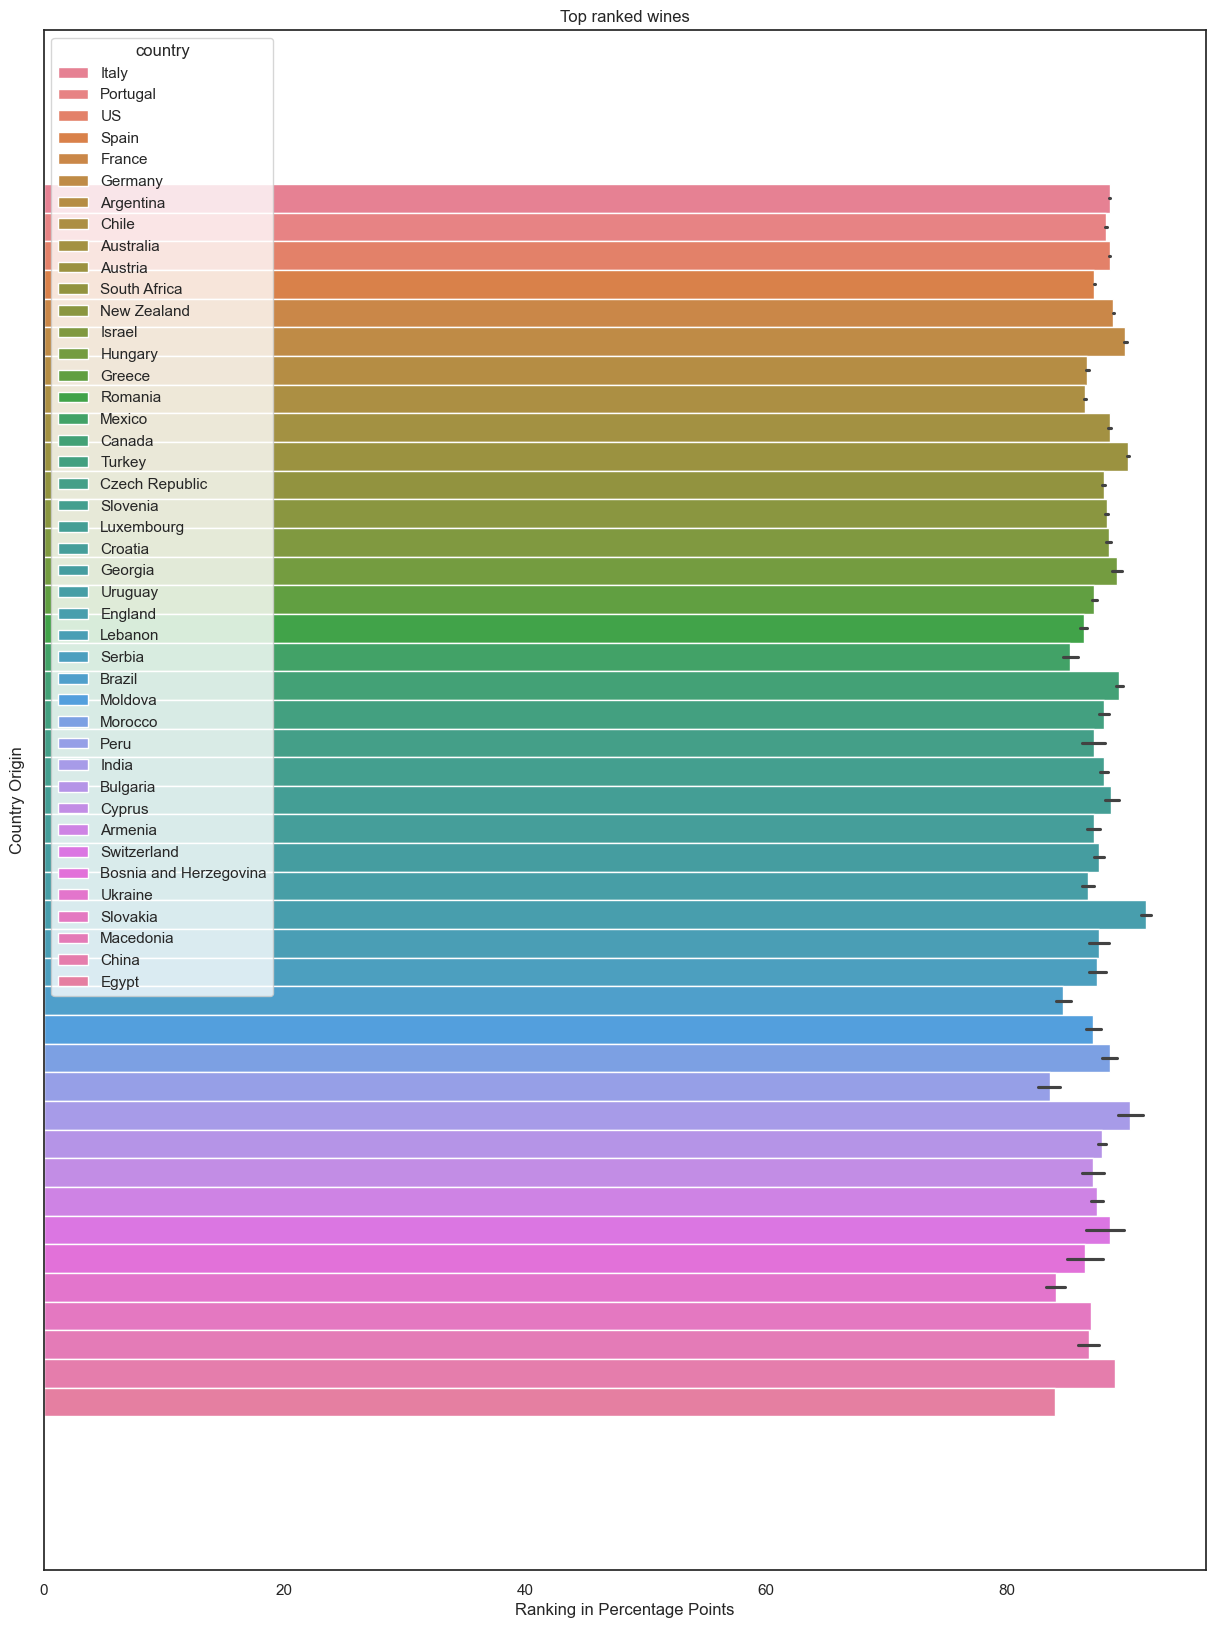

In [324]:
#Setting plotsize 
plt.figure(figsize = (15,20))

#Creating Scatterplot 
sns.barplot(
    data = wines, 
    x = "points",
    hue = "country", 
)

#Labelling of Scatterplot for easier read 
plt.title("Top ranked wines")
plt.xlabel("Ranking in Percentage Points") 
plt.ylabel("Country Origin")

### Wine ranking allocation is distributed evenly among countries, there aren't any countries which have a major advantage in preference. 

# Final Analysis 

### 1. In this data of top rated wines; majority come from the USA, then France, Italy Spain and Portugal. 

### 2. 75% of the wines on the list come from the top 3 countries USA, France and Italy.  

### 3. No Wines are rated higher in one country than any other. Therefore there's no relationship with country origin and quality of wine 

### 4. The higher the quality of wine, the higher the price 

### 5. There seems to be a soft correlation with price of wine and country origin. Countries that produce lower quanntities seem to have higher wine prices, while those with higher quantities seem to have lower prices.